## Data Cleaning on Covid-19 Dataset
Dataset downloaded from: *BigQuery -> Public Datasets -> covid19_jhu_csse -> summary*

**Anusha Cherupalla**

Perform data cleaning on your chosen dataset and produce a thorough report for your Data Scientist peers that meets the following criteria:

- Report must perform basic data cleaning as per the video instructions across the videos and should include at a minimum the following transformations:
    - DONE dropping unneeded columns (you can add a new one and drop it if you believe all columns are necessary),
    - DONE transforming data types (example: from string to numeric, object to categorical/factor, string to datetime, int to geographic, etc. - as needed),
    - DONE dealing with NULL or infinite values (either remove them or replace them with something meaningful),
    - DONE renaming columns, 
    - creating a calculated field based on two other columns,
    - DONE remove duplicate rows,
    - DONE deal with outliers (as appropriate),
    - and any other transformations you think should be performed (if needed, standardizing formats, etc.) 
- Report should include all relevant steps, including how you loaded the file into a dataframe, why you made the cleaning decisions you made, and a link to a shared repository where your new, cleaned dataset can be accessed by anyone with the link.
- Report must include screenshots of the functions you used and the outputs you generated to perform your data cleaning.
- Report must be no longer than 10 pages, not including Appendix materials for citations, additional contextual supporting information, etc. There are no page limits for the Appendix.

In [1]:
import pandas as pd

df = pd.read_csv('/Users/anushacherupalla/Desktop/Health Data Science/Data Management/CSV Files/covid_summary')

In [2]:
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,South Dakota,US,2020-05-15,43.206601,-98.588562,POINT(-98.58856175 43.20660134),8.0,0.0,0.0,8.0,46023.0,Charles Mix,"Charles Mix, South Dakota, US"
1,South Carolina,US,2020-05-15,32.824879,-79.965123,POINT(-79.96512315 32.82487866),501.0,10.0,0.0,491.0,45019.0,Charleston,"Charleston, South Carolina, US"
2,Michigan,US,2020-05-15,45.377900,-85.196141,POINT(-85.19614053 45.37790017),13.0,1.0,0.0,12.0,26029.0,Charlevoix,"Charlevoix, Michigan, US"
3,Florida,US,2020-05-15,26.901310,-81.929491,POINT(-81.92949121 26.90131002),367.0,40.0,0.0,327.0,12015.0,Charlotte,"Charlotte, Florida, US"
4,Virginia,US,2020-05-15,37.019097,-78.663141,POINT(-78.66314092 37.01909701),11.0,0.0,0.0,11.0,51037.0,Charlotte,"Charlotte, Virginia, US"


In [3]:
df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
4264075,Wisconsin,US,2022-09-29,42.747531,-88.059413,POINT(-88.05941254 42.74753117),65770.0,717.0,NaN,NaN,55101.0,Racine,"Racine, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,43.376278,-90.430127,POINT(-90.43012729 43.3762778),4634.0,52.0,NaN,NaN,55103.0,Richland,"Richland, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,42.671516,-89.071479,POINT(-89.071479 42.67151616),50990.0,421.0,NaN,NaN,55105.0,Rock,"Rock, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,45.474989,-91.133301,POINT(-91.1333012 45.47498854),3936.0,60.0,NaN,NaN,55107.0,Rusk,"Rusk, Wisconsin, US"
4264079,Wisconsin,US,2022-09-29,43.425741,-89.949661,POINT(-89.94966132 43.42574087),19382.0,146.0,NaN,NaN,55111.0,Sauk,"Sauk, Wisconsin, US"


In [4]:
df.shape

(4264080, 13)

### Convert Data Types

I then listed out the data types of each column in order to convert them to more appropriate data types. 

FIPS is initially a float, which I then converted to an 'Int64' data type. The number of cases in each category of 'confirmed', 'active', 'recovered' or 'deaths' are in the float data type. Logically, cases are whole numbers, so I converted these to int data types as well.

In [5]:
df.columns

Index(['province_state', 'country_region', 'date', 'latitude', 'longitude',
       'location_geom', 'confirmed', 'deaths', 'recovered', 'active', 'fips',
       'admin2', 'combined_key'],
      dtype='object')

In [6]:
df.dtypes

province_state     object
country_region     object
date               object
latitude          float64
longitude         float64
location_geom      object
confirmed         float64
deaths            float64
recovered         float64
active            float64
fips              float64
admin2             object
combined_key       object
dtype: object

In [7]:
# convert 'date' column from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['confirmed'] = pd.to_numeric(df['confirmed'], errors='coerce').astype("Int64")
df['deaths'] = pd.to_numeric(df['deaths'], errors='coerce').astype("Int64")
df['recovered'] = pd.to_numeric(df['recovered'], errors='coerce').astype("Int64")
df['active'] = pd.to_numeric(df['active'], errors='coerce').astype("Int64")
df['fips'] = pd.to_numeric(df['fips'], errors='coerce').astype("Int64")

In [9]:
df.dtypes

province_state            object
country_region            object
date              datetime64[ns]
latitude                 float64
longitude                float64
location_geom             object
confirmed                  Int64
deaths                     Int64
recovered                  Int64
active                     Int64
fips                       Int64
admin2                    object
combined_key              object
dtype: object

In [10]:
df.describe()

,latitude,longitude,confirmed,deaths,recovered,active,fips
count,4.168817e+06,4.168817e+06,4.264061e+06,4.263638e+06,1.435591e+06,1.427512e+06,3.499492e+06
mean,3.590688e+01,-7.203787e+01,7.424153e+04,1.026421e+03,1.636175e+04,6.556527e+03,3.228783e+04
std,1.305595e+01,5.386805e+01,5.864612e+05,6.351388e+03,1.341763e+05,9.286123e+04,1.793271e+04
min,-7.194990e+01,-1.781165e+02,-3.028440e+05,-1.780000e+02,-8.544050e+05,-6.298082e+06,6.000000e+01
25%,3.326679e+01,-9.657264e+01,8.010000e+02,1.100000e+01,0.000000e+00,5.500000e+01,1.904100e+04
50%,3.793358e+01,-8.686492e+01,3.741000e+03,5.800000e+01,0.000000e+00,4.710000e+02,3.005700e+04
75%,4.213891e+01,-7.765540e+01,1.606500e+04,2.230000e+02,0.000000e+00,2.248000e+03,4.702900e+04
max,7.200000e+01,1.780650e+02,3.861851e+07,6.246410e+05,6.399531e+06,1.087776e+07,9.999900e+04


In [11]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,South Dakota,US,2020-05-15,43.206601,-98.588562,POINT(-98.58856175 43.20660134),8,0,0,8,46023,Charles Mix,"Charles Mix, South Dakota, US"
1,South Carolina,US,2020-05-15,32.824879,-79.965123,POINT(-79.96512315 32.82487866),501,10,0,491,45019,Charleston,"Charleston, South Carolina, US"
2,Michigan,US,2020-05-15,45.377900,-85.196141,POINT(-85.19614053 45.37790017),13,1,0,12,26029,Charlevoix,"Charlevoix, Michigan, US"
3,Florida,US,2020-05-15,26.901310,-81.929491,POINT(-81.92949121 26.90131002),367,40,0,327,12015,Charlotte,"Charlotte, Florida, US"
4,Virginia,US,2020-05-15,37.019097,-78.663141,POINT(-78.66314092 37.01909701),11,0,0,11,51037,Charlotte,"Charlotte, Virginia, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264075,Wisconsin,US,2022-09-29,42.747531,-88.059413,POINT(-88.05941254 42.74753117),65770,717,<NA>,<NA>,55101,Racine,"Racine, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,43.376278,-90.430127,POINT(-90.43012729 43.3762778),4634,52,<NA>,<NA>,55103,Richland,"Richland, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,42.671516,-89.071479,POINT(-89.071479 42.67151616),50990,421,<NA>,<NA>,55105,Rock,"Rock, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,45.474989,-91.133301,POINT(-91.1333012 45.47498854),3936,60,<NA>,<NA>,55107,Rusk,"Rusk, Wisconsin, US"


### Drop Columns
Looking at the head and tail of the dataframe, there are only US data. I listed out the different countries and provinces in this dataset, to see if I could drop any redundant columns, which I could not. The location_geom column is merely the combination of latitude and longitude values, which I do not need, so I dropped this column. The combined_key column is just a combination of the province_state, country_region, and admin2 columns, so I am also dropping this column. I also renamed the admin2 column to county_region to be more accurate.

In [12]:
# how many different countries are included in this data
df['country_region'].nunique()

252

In [13]:
# list countries and counts
c = df['country_region'].value_counts()
c_df = pd.DataFrame({'country_region': c.index, 'count': c.values})

In [14]:
print(c)

US                            3513278
Russia                          84117
Japan                           49860
India                           37195
China                           36851
                               ...   
Hong Kong SAR                       1
Republic of Korea                   1
Iran (Islamic Republic of)          1
Republic of Ireland                 1
East Timor                          1
Name: country_region, Length: 252, dtype: int64


In [15]:
# how many different provinces/states are included in this data
df['province_state'].nunique()

759

In [16]:
# list provinces/states and counts
ps_df = df['province_state'].value_counts()

In [17]:
ps_df

Texas                      272341
Georgia                    174190
Virginia                   144970
Kentucky                   130145
Missouri                   125291
                            ...  
External territories            1
Wuhan Evacuee                   1
Fench Guiana                    1
Unassigned Location, VT         1
Queens County, NY               1
Name: province_state, Length: 759, dtype: int64

In [18]:
df.drop(['location_geom','combined_key'], axis = 1, inplace = True)

In [19]:
df.rename(columns={"admin2": "county_region"})

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active,fips,county_region
0,South Dakota,US,2020-05-15,43.206601,-98.588562,8,0,0,8,46023,Charles Mix
1,South Carolina,US,2020-05-15,32.824879,-79.965123,501,10,0,491,45019,Charleston
2,Michigan,US,2020-05-15,45.377900,-85.196141,13,1,0,12,26029,Charlevoix
3,Florida,US,2020-05-15,26.901310,-81.929491,367,40,0,327,12015,Charlotte
4,Virginia,US,2020-05-15,37.019097,-78.663141,11,0,0,11,51037,Charlotte
...,...,...,...,...,...,...,...,...,...,...,...
4264075,Wisconsin,US,2022-09-29,42.747531,-88.059413,65770,717,<NA>,<NA>,55101,Racine
4264076,Wisconsin,US,2022-09-29,43.376278,-90.430127,4634,52,<NA>,<NA>,55103,Richland
4264077,Wisconsin,US,2022-09-29,42.671516,-89.071479,50990,421,<NA>,<NA>,55105,Rock
4264078,Wisconsin,US,2022-09-29,45.474989,-91.133301,3936,60,<NA>,<NA>,55107,Rusk


In [20]:
df

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active,fips,admin2
0,South Dakota,US,2020-05-15,43.206601,-98.588562,8,0,0,8,46023,Charles Mix
1,South Carolina,US,2020-05-15,32.824879,-79.965123,501,10,0,491,45019,Charleston
2,Michigan,US,2020-05-15,45.377900,-85.196141,13,1,0,12,26029,Charlevoix
3,Florida,US,2020-05-15,26.901310,-81.929491,367,40,0,327,12015,Charlotte
4,Virginia,US,2020-05-15,37.019097,-78.663141,11,0,0,11,51037,Charlotte
...,...,...,...,...,...,...,...,...,...,...,...
4264075,Wisconsin,US,2022-09-29,42.747531,-88.059413,65770,717,<NA>,<NA>,55101,Racine
4264076,Wisconsin,US,2022-09-29,43.376278,-90.430127,4634,52,<NA>,<NA>,55103,Richland
4264077,Wisconsin,US,2022-09-29,42.671516,-89.071479,50990,421,<NA>,<NA>,55105,Rock
4264078,Wisconsin,US,2022-09-29,45.474989,-91.133301,3936,60,<NA>,<NA>,55107,Rusk


### Drop Rows

I checked to see what percentage of each column is made up of null values. I then proceeded to drop any duplicate rows (which there were none) and then removed the rows with missing values. From the previous assignment, I noticed that there were rows where there were negative values in the confirmed, active, deaths and recovered columns, which I want to drop as they don't logically make sense.

In [21]:
# percentage of null values in each column
df_nullcol = df.isnull().mean()*100
print(df_nullcol)

province_state     4.500174
country_region     0.000023
date               0.000000
latitude           2.234081
longitude          2.234081
confirmed          0.000446
deaths             0.010366
recovered         66.332925
active            66.522392
fips              17.930902
admin2            17.811697
dtype: float64


In [22]:
# drop duplicate rows
df.drop_duplicates(keep=False, inplace=True)

In [23]:
df.shape

(4264080, 11)

In [24]:
# remove rows with missing values
df.dropna(inplace=True)

In [25]:
df.shape

(1082280, 11)

In [26]:
df

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active,fips,admin2
0,South Dakota,US,2020-05-15,43.206601,-98.588562,8,0,0,8,46023,Charles Mix
1,South Carolina,US,2020-05-15,32.824879,-79.965123,501,10,0,491,45019,Charleston
2,Michigan,US,2020-05-15,45.377900,-85.196141,13,1,0,12,26029,Charlevoix
3,Florida,US,2020-05-15,26.901310,-81.929491,367,40,0,327,12015,Charlotte
4,Virginia,US,2020-05-15,37.019097,-78.663141,11,0,0,11,51037,Charlotte
...,...,...,...,...,...,...,...,...,...,...,...
4252082,Wyoming,US,2021-03-06,41.659439,-108.882788,3829,36,0,3793,56037,Sweetwater
4252083,Wyoming,US,2021-03-06,43.935225,-110.589080,3375,9,0,3366,56039,Teton
4252084,Wyoming,US,2021-03-06,41.287818,-110.547578,2070,12,0,2058,56041,Uinta
4252086,Wyoming,US,2021-03-06,43.904516,-107.680187,887,26,0,861,56043,Washakie


In [27]:
# create a boolean mask to ID rows with any of the selected columns less than 0
mask = (df[['active', 'deaths', 'recovered', 'confirmed']] < 0).any(axis=1)
df[mask]

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active,fips,admin2
799408,Nevada,US,2020-12-01,39.981009,-116.26832,21,0,0,-330,32011,Eureka


In [28]:
# drop the rows with values less than 0
df = df[~mask]
df

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active,fips,admin2
0,South Dakota,US,2020-05-15,43.206601,-98.588562,8,0,0,8,46023,Charles Mix
1,South Carolina,US,2020-05-15,32.824879,-79.965123,501,10,0,491,45019,Charleston
2,Michigan,US,2020-05-15,45.377900,-85.196141,13,1,0,12,26029,Charlevoix
3,Florida,US,2020-05-15,26.901310,-81.929491,367,40,0,327,12015,Charlotte
4,Virginia,US,2020-05-15,37.019097,-78.663141,11,0,0,11,51037,Charlotte
...,...,...,...,...,...,...,...,...,...,...,...
4252082,Wyoming,US,2021-03-06,41.659439,-108.882788,3829,36,0,3793,56037,Sweetwater
4252083,Wyoming,US,2021-03-06,43.935225,-110.589080,3375,9,0,3366,56039,Teton
4252084,Wyoming,US,2021-03-06,41.287818,-110.547578,2070,12,0,2058,56041,Uinta
4252086,Wyoming,US,2021-03-06,43.904516,-107.680187,887,26,0,861,56043,Washakie


### Outliers

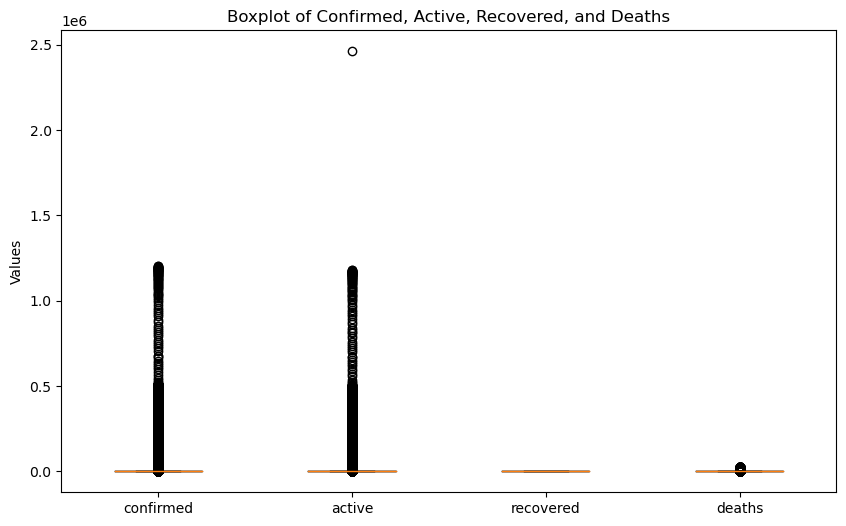

In [29]:
import matplotlib.pyplot as plt

data = df[['confirmed', 'active', 'recovered', 'deaths']]

plt.figure(figsize=(10, 6))
plt.boxplot(data.values, labels=data.columns)
plt.title('Boxplot of Confirmed, Active, Recovered, and Deaths')
plt.ylabel('Values')
plt.show()

In [30]:
df

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active,fips,admin2
0,South Dakota,US,2020-05-15,43.206601,-98.588562,8,0,0,8,46023,Charles Mix
1,South Carolina,US,2020-05-15,32.824879,-79.965123,501,10,0,491,45019,Charleston
2,Michigan,US,2020-05-15,45.377900,-85.196141,13,1,0,12,26029,Charlevoix
3,Florida,US,2020-05-15,26.901310,-81.929491,367,40,0,327,12015,Charlotte
4,Virginia,US,2020-05-15,37.019097,-78.663141,11,0,0,11,51037,Charlotte
...,...,...,...,...,...,...,...,...,...,...,...
4252082,Wyoming,US,2021-03-06,41.659439,-108.882788,3829,36,0,3793,56037,Sweetwater
4252083,Wyoming,US,2021-03-06,43.935225,-110.589080,3375,9,0,3366,56039,Teton
4252084,Wyoming,US,2021-03-06,41.287818,-110.547578,2070,12,0,2058,56041,Uinta
4252086,Wyoming,US,2021-03-06,43.904516,-107.680187,887,26,0,861,56043,Washakie


In [31]:
df[['confirmed', 'active', 'deaths', 'recovered']].describe()

,confirmed,active,deaths,recovered
count,1.082279e+06,1.082279e+06,1.082279e+06,1082279.0
mean,3.098858e+03,3.027616e+03,6.859870e+01,0.0
std,1.593753e+04,1.579589e+04,4.145237e+02,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.600000e+01,5.100000e+01,1.000000e+00,0.0
50%,3.860000e+02,3.730000e+02,7.000000e+00,0.0
75%,1.629000e+03,1.590000e+03,3.200000e+01,0.0
max,1.201868e+06,2.461378e+06,2.368900e+04,0.0


In [32]:
# drop recovered column as the values are all 0
df.drop(['recovered'], axis = 1, inplace = True)

/var/folders/4_/242b0t4x2xz9cmmj1_kz2h0h0000gn/T/ipykernel_90860/3445997874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['recovered'], axis = 1, inplace = True)


<AxesSubplot:ylabel='active'>

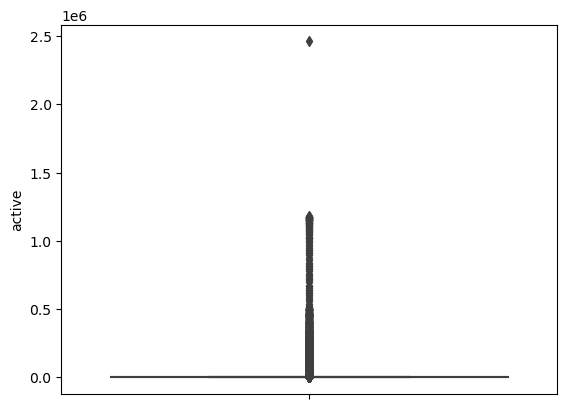

In [33]:
import seaborn as sns
sns.boxplot(y=df['active'])

In [34]:
upper_limit = df['active'].mean() + 3* df['active'].std()
lower_limit = df['active'].mean() - 3* df['active'].std()
print(upper_limit)
print(lower_limit)

50415.2963637324
-44360.06455012427


In [35]:
df.loc[df['active'] >= upper_limit, 'active']

172         57143
1496       169881
20919       99414
20969      102102
38781       78483
            ...  
4251734    139000
4251742     90420
4251798     66538
4251911     83600
4252031    106347
Name: active, Length: 9571, dtype: Int64

In [36]:
df

,province_state,country_region,date,latitude,longitude,confirmed,deaths,active,fips,admin2
0,South Dakota,US,2020-05-15,43.206601,-98.588562,8,0,8,46023,Charles Mix
1,South Carolina,US,2020-05-15,32.824879,-79.965123,501,10,491,45019,Charleston
2,Michigan,US,2020-05-15,45.377900,-85.196141,13,1,12,26029,Charlevoix
3,Florida,US,2020-05-15,26.901310,-81.929491,367,40,327,12015,Charlotte
4,Virginia,US,2020-05-15,37.019097,-78.663141,11,0,11,51037,Charlotte
...,...,...,...,...,...,...,...,...,...,...
4252082,Wyoming,US,2021-03-06,41.659439,-108.882788,3829,36,3793,56037,Sweetwater
4252083,Wyoming,US,2021-03-06,43.935225,-110.589080,3375,9,3366,56039,Teton
4252084,Wyoming,US,2021-03-06,41.287818,-110.547578,2070,12,2058,56041,Uinta
4252086,Wyoming,US,2021-03-06,43.904516,-107.680187,887,26,861,56043,Washakie


In [37]:
# remove data points that fall outside of 1.5 times the IQR from the lower and upper quartiles
# 'active' column
Q1 = df['active'].quantile(0.25)
Q3 = df['active'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['active'] >= Q1 - 1.5 * IQR) & (df['active'] <= Q3 + 1.5 * IQR)]

In [38]:
df

,province_state,country_region,date,latitude,longitude,confirmed,deaths,active,fips,admin2
0,South Dakota,US,2020-05-15,43.206601,-98.588562,8,0,8,46023,Charles Mix
1,South Carolina,US,2020-05-15,32.824879,-79.965123,501,10,491,45019,Charleston
2,Michigan,US,2020-05-15,45.377900,-85.196141,13,1,12,26029,Charlevoix
3,Florida,US,2020-05-15,26.901310,-81.929491,367,40,327,12015,Charlotte
4,Virginia,US,2020-05-15,37.019097,-78.663141,11,0,11,51037,Charlotte
...,...,...,...,...,...,...,...,...,...,...
4252082,Wyoming,US,2021-03-06,41.659439,-108.882788,3829,36,3793,56037,Sweetwater
4252083,Wyoming,US,2021-03-06,43.935225,-110.589080,3375,9,3366,56039,Teton
4252084,Wyoming,US,2021-03-06,41.287818,-110.547578,2070,12,2058,56041,Uinta
4252086,Wyoming,US,2021-03-06,43.904516,-107.680187,887,26,861,56043,Washakie


In [39]:
# 'confirmed' column
Q1 = df['confirmed'].quantile(0.25)
Q3 = df['confirmed'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['confirmed'] >= Q1 - 1.5 * IQR) & (df['confirmed'] <= Q3 + 1.5 * IQR)]

In [40]:
# 'deaths' column
Q1 = df['deaths'].quantile(0.25)
Q3 = df['deaths'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['deaths'] >= Q1 - 1.5 * IQR) & (df['deaths'] <= Q3 + 1.5 * IQR)]

In [41]:
df

,province_state,country_region,date,latitude,longitude,confirmed,deaths,active,fips,admin2
0,South Dakota,US,2020-05-15,43.206601,-98.588562,8,0,8,46023,Charles Mix
1,South Carolina,US,2020-05-15,32.824879,-79.965123,501,10,491,45019,Charleston
2,Michigan,US,2020-05-15,45.377900,-85.196141,13,1,12,26029,Charlevoix
4,Virginia,US,2020-05-15,37.019097,-78.663141,11,0,11,51037,Charlotte
5,Virginia,US,2020-05-15,38.035279,-78.485696,71,2,69,51540,Charlottesville
...,...,...,...,...,...,...,...,...,...,...
4252079,Wyoming,US,2021-03-06,42.132991,-104.966331,597,11,586,56031,Platte
4252081,Wyoming,US,2021-03-06,42.765583,-109.913092,679,7,672,56035,Sublette
4252084,Wyoming,US,2021-03-06,41.287818,-110.547578,2070,12,2058,56041,Uinta
4252086,Wyoming,US,2021-03-06,43.904516,-107.680187,887,26,861,56043,Washakie


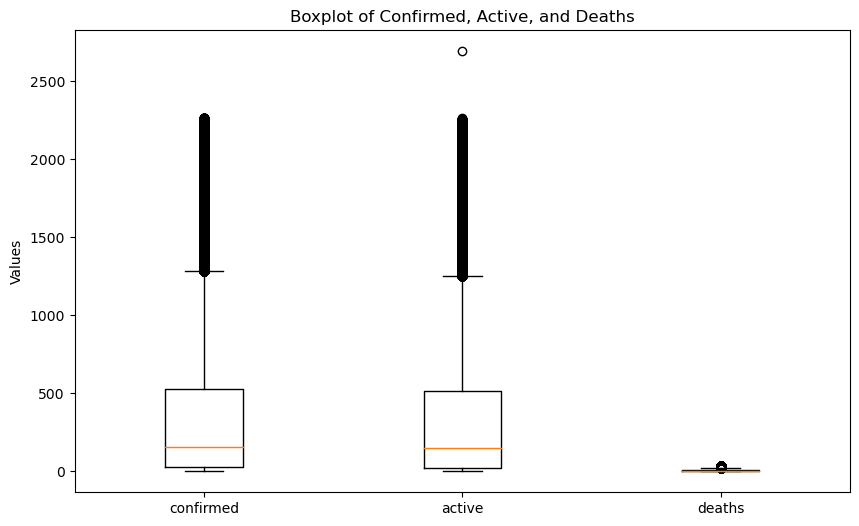

In [42]:
data = df[['confirmed', 'active', 'deaths']]

plt.figure(figsize=(10, 6))
plt.boxplot(data.values, labels=data.columns)
plt.title('Boxplot of Confirmed, Active, and Deaths')
plt.ylabel('Values')
plt.show()

In [43]:
ccs_clean = "cleaned_covid.csv"

df.to_csv(ccs_clean, index=False)

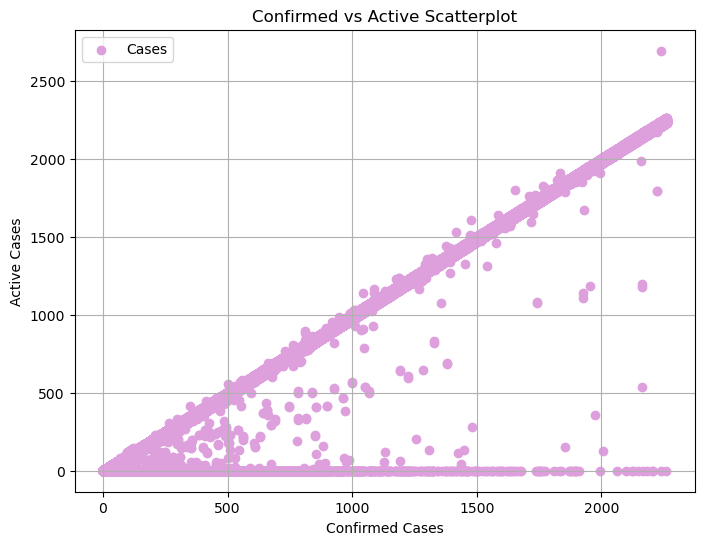

In [46]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['confirmed'], df['active'], c='plum', label='Cases')
plt.title('Confirmed vs Active Scatterplot')
plt.xlabel('Confirmed Cases')
plt.ylabel('Active Cases')
plt.grid(True)
plt.legend()
plt.show()

In [45]:
df['country_region'].nunique()

1